# Modeling Uncertainty with Monte Carlo Simulation and Distribution Fitting

In this notebook, we will explore two distinct but related approaches to understanding and modeling uncertainty in data:
- **Monte Carlo Simulation** for estimating probabilities
- **Distribution Fitting** to model data and estimate unknown parameters

By leveraging these methods, we gain insights into both discrete probability scenarios and continuous data distributions, demonstrating powerful techniques for data analysis.

## Part 1: Probability Estimation via Monte Carlo Simulation

Monte Carlo simulation is a technique that uses random sampling to estimate probabilities. Here, we apply it to simulate coin-tossing experiments, assessing outcomes over numerous trials.

### Import Required Libraries

# Probability in Python

## Importing Packages
At first we are going to import RANDOM module.



In [1]:
import random


## Defining a Coin Toss Function
We are defining a variable "flip_coin" to create the properties of getting 2 Tails and 3 Heads while tossing a coin 5 times.

In [2]:
def flip_coin():
    return random.choice(['Heads', 'Tails'])





```
# This is formatted as code
```

**Estimating probabilty by simulation - MONTE CARLO:**

Monte Carlo simulation is a technique that uses random sampling to estimate numerical results. The formula for estimating probability using Monte Carlo simulation is quite simple. It involves the ratio of favorable outcomes to the total number of trials:


Probability = Number of Favorable Outcomes / Total Number of Trials

​

In the context of Monte Carlo simulation, the steps are as follows:

1. Define a system or process that involves randomness.
2. Simulate this system multiple times using random sampling.
3. Count occurrences of the favorable outcome.
4. Calculate probability by dividing favorable outcomes by total trials.



In Python, when conducting a Monte Carlo simulation, the formula is implemented in code by counting the occurrences of a specific condition (favorable outcome) during the simulation and dividing it by the total number of trials.

# Estimating probability by simulation - Monte Carlo

The probability of an event $A$ can be estimated as follows. We can simulate the experiment repeatedly and independently, say $N$ times, and count the number of times the event occurred, say $N_A$.

A good estimate of $P(A)$ is the following:
$$P(A) \approx \frac{N_A}{N}$$
As $N$ grows larger and larger, the estimate becomes better and better. This method is generally termed as Monte Carlo simulation.

We will first evaluate probability of coin toss described above using Monte Carlo simulations. There are two steps: generate a large number of tosses and count the number of heads or tails. These two steps can be written in a single loop usually.

You should run the simulation multiple times to see what probability estimate is obtained each time. You will see that the estimate is close to 0.5.


## Part 2: Distribution Fitting to Model Data

After simulating data with Monte Carlo techniques, we may want to fit our data to known distributions to estimate parameters and make predictions. This section covers steps to fit distributions and estimate parameters, using the Gamma distribution as an example.

### Objectives

- **Plot a histogram** for the generated data.
- **Fit a known distribution** (e.g., Gamma) to the data.
- **Estimate parameters** using different methods.
- **Construct confidence intervals** for estimated parameters.
### Import Required Libraries

In [3]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

## Generate Gamma Distribution Data

Here, we create a dataset based on a Gamma distribution. This will allow us to test our distribution fitting process.


In [4]:
# # Set the shape and scale parameters of the gamma distribution

# shape = 2
# scale = 3

# # Generate a scores dataset of size n with the gamma distribution
# n = 1000
# scores = np.random.gamma(shape, scale, n)

## Step 3: Transform Data to DataFrame

To facilitate analysis, we'll convert our data into a DataFrame format.


In [5]:
# df = pd.DataFrame(scores)
# df

# Extracting as .xlsx File

We  will now run This cell and Then Upload your downloaded data file

In [6]:
from google.colab import files
import io

uploaded = files.upload()
file_name = next(iter(uploaded.keys()))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df


Saving Advertising.csv to Advertising.csv


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Histogram for the data.
We see that there are over 1000 samples of data. To get a sense of the distribution, we should plot a histogram.

(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

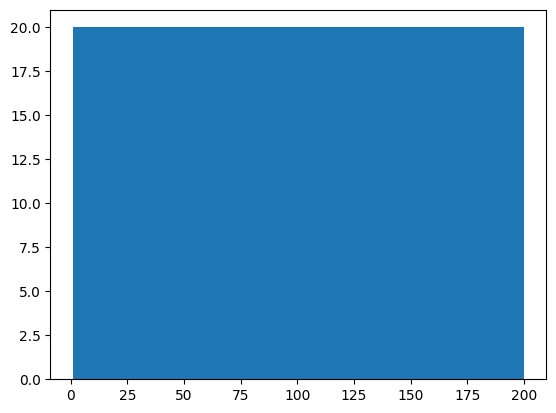

In [7]:
plt.hist(df[df.columns[0]], bins=10)

From the histogram, the distribution could be modelled as Gamma$(\alpha,\beta)$. The next step is to estimate $\alpha$ and $\beta$ from the given samples.


# Estimator identified by using Methods of moments

Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1=\frac{\alpha}{\beta},$$
$$m_2=\frac{\alpha^2}{\beta^2}+\frac{\alpha}{\beta^2}.$$
The solution results in
$$\hat{\alpha}_{MM}=\frac{m_1^2}{m_2-m_1^2}=\frac{m_1^2}{s^2},\hat{\beta}_{MM}=\frac{m_1}{m_2-m_1^2}=\frac{m_1}{s^2}.$$
We now compute the values of $m_1$ (sample mean) and $s^2=m_2-m_1^2$ (sample variance) from the data. After that, we can compute the estimates.

In [8]:
x = np.array(df)
m1 = np.average(x)
ss= np.var(x)
print(m1)
print(ss)

63.076600000000006
4977.10877244


# Identifying Estimator using method of moments

In [9]:
alphaMM = m1*m1/ss
betaMM = m1/ss
print(alphaMM)
print(betaMM)

0.7993913031580151
0.012673341669620985


# Plotting the estimate to check if it gives reasonable fit

We can plot the density of the Gamma on top of the density histogram to check if the estimate gives a reasonable fit.

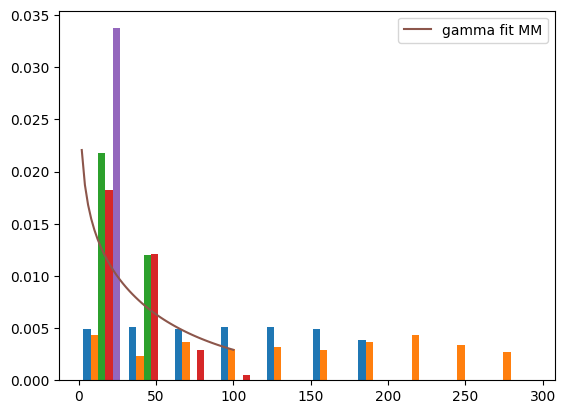

In [10]:
fig, ax = plt.subplots(1,1)
ax.hist(x,density=True, bins=10)
xx = np.linspace(0,100,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),label='gamma fit MM')
ax.legend (loc='best')
plt.show()

# Bootstrap

How do we find the bias and variance of the estimator?
Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases.

Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found $\hat{\alpha}_{MM}=1.9038...$ and $\hat{\beta}_{MM}=0.3192...$.

Using these values, we simulate $n=1000$ *iid* samples from Gamma$(1.9038...,0.3192...)$ and, using the simulated samples, we compute new estimates of $\alpha$ and $\beta$ and call them $\hat{\alpha}_{MM}(1)$ and $\hat{\beta}_{MM}(1)$.

Now, repeat the simulation $N$ times to get estimates $\hat{\alpha}_{MM}(i)$ and $\hat{\beta}_{MM}(i)$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{\alpha}_{MM}(1), \hat{\alpha}_{MM}(2),\ldots,\hat{\alpha}_{MM}(N)\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [11]:
N = 1000
n = 1000
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM, scale=1/betaMM, size=n)
  mli = np.average(xi); ssi = np.var(xi)
  alpha_hat[i] =mli * mli/ssi; beta_hat[i]= mli/ssi

# Histogram of estimates

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([ 10.3346067 ,  48.22816458, 141.23962484, 251.47542959,
        382.38044773, 425.44130896, 260.08760183, 127.46014924,
         44.78329568,  31.00382009]),
 array([0.00980893, 0.0103895 , 0.01097008, 0.01155065, 0.01213122,
        0.0127118 , 0.01329237, 0.01387295, 0.01445352, 0.01503409,
        0.01561467]),
 <BarContainer object of 10 artists>)

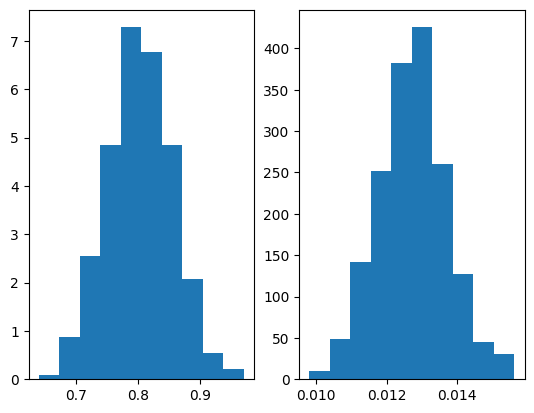

In [12]:
ax1 = plt.subplot(121)
ax1.hist(alpha_hat, density= True)
ax2 = plt.subplot(122)
ax2.hist(beta_hat, density= True)

Notice how the histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [13]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.052602257901891686
0.0009771881742246214


# Confidence intervals

Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{\alpha}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{\alpha}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{\alpha}{2}-\frac{\alpha}{2}=1-\alpha.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-\alpha,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-\alpha)$% confidence interval.

## Bootstrap confidence intervals
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{\alpha}_{MM}(1)-1.0123...,\ldots,\hat{\alpha}_{MM}(N)-1.0123...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [14]:
del1 = np.percentile(alpha_hat - alphaMM, 97.5)
del2 = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1, del2])

[0.10576010888018854, -0.09798309612974064]


# **Maximum Likelihood**

We now turn to the maximum likelihood estimator for $\alpha$ and $\beta$. The likelihood $L(x_1,\ldots,x_n)$ can be written as
$$L = \frac{\beta^\alpha}{\Gamma(\alpha)}x_1^{\alpha-1}e^{-\beta x_1}\,\frac{\beta^\alpha}{\Gamma(\alpha)}x_2^{\alpha-1}e^{-\beta x_2}\cdots \frac{\beta^\alpha}{\Gamma(\alpha)}x_n^{\alpha-1}e^{-\beta x_n}= \frac{\beta^{n\alpha}}{\Gamma(\alpha)^n}(x_1\cdots x_n)^{\alpha-1}e^{-\beta(x_1+\cdots+x_n)},$$
$$\log L = n\alpha\log\beta-n\log\Gamma(\alpha)+(\alpha-1)\log(x_1\cdots x_n)-\beta(x_1+\cdots+x_n).$$
Differentiating $\log L$ with respect to $\beta$ and equating to zero, we get
$$n\alpha\frac{1}{\beta}-(x_1+\cdots+x_n)=0,\text{or }\alpha=\beta \frac{x_1+\cdots+x_n}{n}.$$
Differentiating $\log L$ with respect to $\alpha$ and equating to zero, we get
$$n\log\beta-n\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}+\log(x_1\cdots x_n)=0.$$
So, we get two equations in the two variables $\alpha$ and $\beta$. However, the equations do not have a closed form solution, and we need to solve them numerically or approximately. From the first equation, we have $\log\beta=\log\alpha-\log\frac{x_1+\cdots+x_n}{n}$. Using this in the second equation, we get
$$\log\alpha - \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}=\log\frac{x_1+\cdots+x_n}{n}-\frac{1}{n}\log(x_1\cdots x_n).$$
We will now solve the above equation to find the ML estimate of $\alpha$. This will be a numerical solution.

Estimators for the unknown parameter(s) by maximum likelihood

In [15]:
lm1 = np.average(np.log(x))
from scipy.special import digamma
fML = lambda a: (np.log(a) - digamma(a) - np.log(m1)+lm1)

<ipython-input-15-7d620bcf4592>:1: RuntimeWarning: divide by zero encountered in log
  lm1 = np.average(np.log(x))


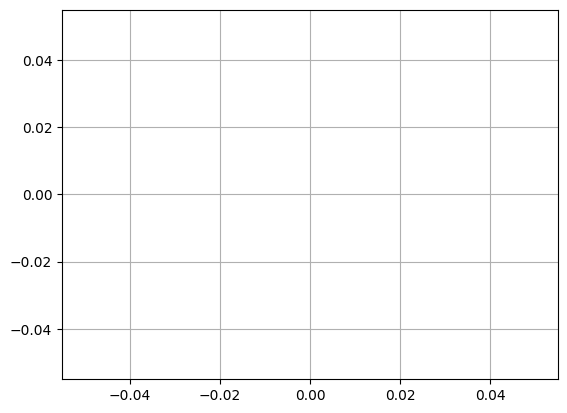

In [16]:
fig, ax = plt.subplots(1,1)

xx = np.linspace(0.1, 10, 100)
yy = fML(xx)

ax.plot(xx, yy)
# ax.plot(xx, fML(xx))
ax.grid(True)
plt.show()

#For solving numerically, we will use scipy.optimize

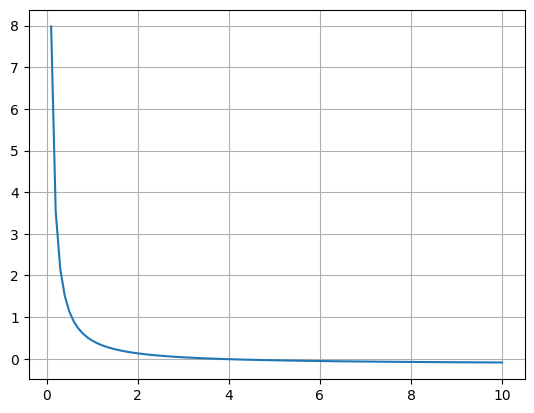

3.7016438100088584


In [17]:
import numpy as np
from scipy.special import digamma
import scipy.optimize as sopt
import matplotlib.pyplot as plt

# Assuming you have defined x, m1, and lm1 somewhere before this
# For example:
# x = np.array([1, 2, 3, 4, 5])  # Replace with your actual data
# Check for and handle zero or negative values in x before taking the logarithm
x = np.array([1, 2, 3, 4, 5]) # Replace with your actual data. Ensure values are positive
x = np.where(x <= 0, 1e-10, x) # Replace zero or negative with small positive number


m1 = np.mean(x)
lm1 = np.mean(np.log(x))

# Define the function for which you want to find the root
fML = lambda a: (np.log(a) - digamma(a) - np.log(m1) + lm1)

# Plot the function to visualize it and find a suitable bracket
fig, ax = plt.subplots(1, 1)
xx = np.linspace(0.1, 10, 100)
yy = fML(xx)
ax.plot(xx, yy)
ax.grid(True)
plt.show()

# Based on the plot, choose a new bracket where the function crosses the x-axis
# For example, if the plot shows a root between 1 and 5, use:
# If the plot doesn't show a clear root crossing, adjust the bracket or the function
sol = sopt.root_scalar(fML, bracket=[0.1, 10])  # Adjust bracket if needed

# Print the root
print(sol.root)

In [18]:
alphaML =  sol.root
betaML = alphaML/m1
print([alphaML, betaML])

[3.7016438100088584, 1.233881270002953]


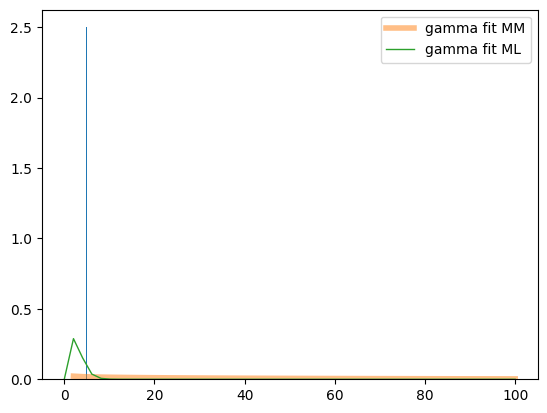

In [19]:
fig,ax = plt.subplots(1,1)
ax.hist(x, density=True, bins=50)
xx = np.linspace(0,100,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM), lw='4', alpha=0.5, label='gamma fit MM')
ax.plot(xx, st.gamma.pdf(xx, alphaML, scale=1/betaML), lw='1', label='gamma fit ML')
ax.legend(loc ='best')
plt.show()
